In [1]:
import sympy as sp                # Biblioteca para el cálculo simbólico

def sTdh(d, th, a, alpha):
    cth = sp.cos(th); sth = sp.sin(th)
    ca = sp.cos(alpha); sa = sp.sin(alpha)
    Tdh = sp.Matrix([[cth, -ca*sth,  sa*sth, a*cth],
                     [sth,  ca*cth, -sa*cth, a*sth],
                     [0,        sa,     ca,      d],
                     [0,         0,      0,      1]])
    return Tdh

In [16]:
# Variables simbólicas
q1, q2, q3, q4, q5, q6 = sp.symbols("q1 q2 q3 q4 q5 q6")
l1, l2, l3, l4, l5 = sp.symbols("l1 l2 l3 l4 l5")

# Transformaciones homogéneas
T01 = sTdh( l1, sp.pi/2+q1, 0, 0)
T12 = sTdh( q2+l2, 0,  0,   sp.pi/2)
T23 = sTdh(   0,   sp.pi+q3, l3, 0)
T34 = sTdh( 0,   q4,    l4, 0)
T45 = sTdh(   0,   q5,    0, sp.pi/2)
T56 = sTdh(   -l5,  sp.pi+q6,    0, 0)

# Transformación homogénea final
Tf = sp.simplify(T01*T12*T23*T34*T45*T56)

# Mostrar las transformaciones homogéneas (display funciona con IPython)
print("T01:"); display(T01)
print("T12:"); display(T12)
print("T23:"); display(T23)
print("T34:"); display(T34)
print("T45:"); display(T45)
print("T56:"); display(T56)
print("T06:"); display(Tf)

T01:


Matrix([
[-sin(q1), -cos(q1), 0,  0],
[ cos(q1), -sin(q1), 0,  0],
[       0,        0, 1, l1],
[       0,        0, 0,  1]])

T12:


Matrix([
[1, 0,  0,       0],
[0, 0, -1,       0],
[0, 1,  0, l2 + q2],
[0, 0,  0,       1]])

T23:


Matrix([
[-cos(q3),  sin(q3), 0, -l3*cos(q3)],
[-sin(q3), -cos(q3), 0, -l3*sin(q3)],
[       0,        0, 1,           0],
[       0,        0, 0,           1]])

T34:


Matrix([
[cos(q4), -sin(q4), 0, l4*cos(q4)],
[sin(q4),  cos(q4), 0, l4*sin(q4)],
[      0,        0, 1,          0],
[      0,        0, 0,          1]])

T45:


Matrix([
[cos(q5), 0,  sin(q5), 0],
[sin(q5), 0, -cos(q5), 0],
[      0, 1,        0, 0],
[      0, 0,        0, 1]])

T56:


Matrix([
[-cos(q6),  sin(q6), 0,   0],
[-sin(q6), -cos(q6), 0,   0],
[       0,        0, 1, -l5],
[       0,        0, 0,   1]])

T06:


Matrix([
[-sin(q1)*cos(q6)*cos(q3 + q4 + q5) - sin(q6)*cos(q1),  sin(q1)*sin(q6)*cos(q3 + q4 + q5) - cos(q1)*cos(q6),  sin(q1)*sin(q3 + q4 + q5),      (l3*cos(q3) + l4*cos(q3 + q4) - l5*sin(q3 + q4 + q5))*sin(q1)],
[-sin(q1)*sin(q6) + cos(q1)*cos(q6)*cos(q3 + q4 + q5), -sin(q1)*cos(q6) - sin(q6)*cos(q1)*cos(q3 + q4 + q5), -sin(q3 + q4 + q5)*cos(q1),     (-l3*cos(q3) - l4*cos(q3 + q4) + l5*sin(q3 + q4 + q5))*cos(q1)],
[                           sin(q3 + q4 + q5)*cos(q6),                           -sin(q6)*sin(q3 + q4 + q5),          cos(q3 + q4 + q5), l1 + l2 - l3*sin(q3) - l4*sin(q3 + q4) - l5*cos(q3 + q4 + q5) + q2],
[                                                   0,                                                    0,                          0,                                                                  1]])

In [17]:
# Valor cuando todos los ángulos son cero
print("T06 cuando q=(0,0,0,0,0,0):")
Tf.subs({q1:0., q2:0., q3:0., q4:0., q5:0., q6:0.})

T06 cuando q=(0,0,0,0,0,0):


Matrix([
[0, -1, 0,            0],
[1,  0, 0,     -l3 - l4],
[0,  0, 1, l1 + l2 - l5],
[0,  0, 0,            1]])

In [18]:
import numpy as np

def Tdh(d, th, a, alpha):
    cth = np.cos(th);    sth = np.sin(th)
    ca = np.cos(alpha);  sa = np.sin(alpha)
    Tdh = np.array([[cth, -ca*sth,  sa*sth, a*cth],
                    [sth,  ca*cth, -sa*cth, a*sth],
                    [0,        sa,     ca,      d],
                    [0,         0,      0,      1]])
    return Tdh

In [22]:
# Cinemática directa del robot
def cdirecta_Drobot(q):
    """ Retorna los sistemas de referencia de cada eslabón con respecto a la base
    Asumiendo: 
    l1 = l2 = 65 cm
    l3 = l4 = 45 cm
    l5 = 30 cm 
    """

    # Transformaciones homogéneas de DH
    T01 = Tdh( 65,   np.pi/2+q[0], 0, 0);
    T12 = Tdh( q[1]+65, 0,  0,   np.pi/2);
    T23 = Tdh(   0,   q[2]+np.pi, 45, 0);
    T34 = Tdh( 0,   q[3],   45, 0);
    T45 = Tdh(   0,   q[4],    0, np.pi/2);
    T56 = Tdh(   -30,      np.pi+q[5], 0, 0);
    # Efector final con respecto a la base
    Tf = T01.dot(T12).dot(T23).dot(T34).dot(T45).dot(T56)
    return Tf

In [23]:
# Ejemplo de cálculo de la cinemática directa
q = np.array([0., 0., 0., 0., 0., 0.])

# Cinemática directa
Te = cdirecta_Drobot(np.deg2rad(q))   # Cinemática directa

# Mostrar el resultado
print("Efector final con respecto a la base cuando q1={}, q2={}, q3={}, q4={}, q5={}, q6={}".format(q[0], q[1], q[2],
                                                                                                    q[3], q[4], q[5]))

print(np.round(Te,4))

Efector final con respecto a la base cuando q1=0.0, q2=0.0, q3=0.0, q4=0.0, q5=0.0, q6=0.0
[[  0.  -1.   0.  -0.]
 [  1.   0.   0. -90.]
 [ -0.  -0.   1. 100.]
 [  0.   0.   0.   1.]]


In [24]:
# ESTA PARTE SE DEBE COPIAR CADA VEZ QUE SE DESEA TRABAJAR CON CUALQUIER
# EJERCICIO DE "DENAVIT-HARTENBERG" YPODER VISUALIZARLO EN VIDEO

import numpy as np
import sympy as sp
from sympy.matrices import Matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class SerialRobot(object):
    def __init__(self, L, name='robot'):
        """
        Constructor for the serial robot
          L - List containing the DH parameters in the following format
                [[d1, th1, a1, alpha1, rp1], [d2, th2, a2, alpha2, rp2],...]
              where rp can be 'r' for revolute joint, or 'p' for prismatic joint.
          name - String containing the robot name
          
        """
        self.name = name
        self.ndof = len(L)
        self.type = [i[4] for i in L]
        # DH parameters
        self.d = [i[0] for i in L] 
        self.th = [i[1] for i in L]
        self.a = [i[2] for i in L]
        self.alpha = [i[3] for i in L]
        # Store the transformation matrices
        self.Ts = self.ndof*[0,]
        # Store indication that d is zero
        self.isdzero = self.ndof*[True, ]
        for k in range(self.ndof):
            if self.type[k] == 'p':
                self.isdzero[k] = False
            if np.abs(self.d[k])>1e-6:
                self.isdzero[k] = False
        # Store points for plot
        self.p = (self.isdzero.count(False)+self.ndof)*[0,]
        
    def _Tdh(self, k, d, th):
        cth = np.cos(self.th[k]+th); sth = np.sin(self.th[k]+th)
        ca = np.cos(self.alpha[k]); sa = np.sin(self.alpha[k])
        return np.array([[cth, -ca*sth, sa*sth, self.a[k]*cth],
                         [sth, ca*cth, -sa*cth, self.a[k]*sth],
                         [0., sa, ca, self.d[k]+d],
                         [0., 0., 0., 1.]])
    
    def _sym_Tdh(self, k):
        cth = sp.cos(self.th[k]); sth = sp.sin(self.th[k])
        ca = sp.cos(self.alpha[k]); sa = sp.sin(self.alpha[k])
        return Matrix([[cth, -ca*sth, sa*sth, self.a[k]*cth],
                       [sth, ca*cth, -sa*cth, self.a[k]*sth],
                       [0, sa, ca, self.d[k]],
                       [0, 0, 0, 1]])

    def get_name(self):
        """Returns the robot name
        """
        return self.name
        
    def sym_fkine(self, verbose=False):
        """
        Compute the symbolic forward kinematics of the robot.
           verbose - shows intermediate matrices
        
        """
        Tf = sp.eye(4)
        for k in range(self.ndof):
            if self.type[k]=='r':
                T = self._sym_Tdh(k)
                if(verbose):
                    print('\nT'+str(k)+str(k+1)+':')
                    try:
                        display(T)
                    except NameError:
                        sp.pprint(T)
            elif self.type[k]=='p':
                T = self._sym_Tdh(k)
                if(verbose):
                    print('\nT'+str(k)+str(k+1)+':')
                    try:
                        display(T)
                    except NameError:
                        sp.pprint(T)
            else:
                print('not supported joint type')
            Tf = sp.simplify(Tf*T)
        return Tf
    
    def fkine(self, q, verbose=False):
        """
        Compute the forward kinematics of the robot given a joint configuration
           q - Joint configuration
           verbose - shows intermediate matrices
        
        """
        if len(q)!=self.ndof:
            print("Error: incorrect number of joints")
            return 0
        Tf = np.eye(4)
        for k in range(self.ndof):
            if self.type[k]=='r':
                T = self._Tdh(k, 0., q[k])
                if(verbose):
                    print('\nT'+str(k)+str(k+1)+':')
                    print(np.round(T,3));
            elif self.type[k]=='p':
                T = self._Tdh(k, q[k], 0.)
                if(verbose):
                    print('\nT'+str(k)+str(k+1)+':')
                    print(np.round(T,3));
            else:
                print('not supported joint type')
            self.Ts[k] = T
            Tf = Tf.dot(T)
        return Tf

    def plot(self, q, ee=True, axlimits=None, elev=25, azim=45, ascale=0.4, cscale=0.1):
        """
        Basic plot of the robot using lines and showing the joints with green "cylinders"
        
        Arguments
           q - Joint configuration vector (1D)
           ee - If true (default), an end-effector is plotted
           axlimits - Limits for the figure axes [[xmin,xmax],[ymin,ymax],[zmin,zmax]]. If not
                      specified, the default axes are used
           elev - elevation [in degrees] for the plot view
           azim - azimuth [in degrees] for the plot view
           ascale - scale for the axis at the base and end effector
           cscale - scale for the "cylinders"
           
        """
        # Compute intermediate DH homogeneous transformations
        pcnt = 0
        # Initial intermediate point
        if (not self.isdzero[0]):
            if self.type[0]=='r':
                self.p[pcnt] = np.array([0.,0.,self.d[0],1.])
                pcnt+=1
            elif self.type[0]=='p':
                self.p[pcnt] = np.array([0.,0.,self.d[0]+q[0],1.])
                pcnt+=1
        # Loop around all the ndofs
        for k in range(self.ndof):
            if self.type[k]=='r':
                T = self._Tdh(k, 0., q[k])
                if (not self.isdzero[k] and k!=0):
                    self.p[pcnt] = np.array([0.,0.,self.d[k],1.])
            elif self.type[k]=='p':
                T = self._Tdh(k, q[k], 0.)
                if (not self.isdzero[k] and k!=0):
                    self.p[pcnt] = np.array([0.,0.,self.d[k]+q[k],1.])
            else:
                print('wrong joint type')
            if k==0:
                self.Ts[k] = T
                self.p[pcnt] = self.Ts[k][:,3]
                pcnt+=1
            else:
                self.Ts[k] = self.Ts[k-1].dot(T)
                if (not self.isdzero[k]):
                    self.p[pcnt] = self.Ts[k-1].dot(self.p[pcnt])
                    pcnt+=1
                self.p[pcnt] = self.Ts[k][:,3]
                pcnt+=1
        # Clear the figure
        plt.clf()
        ax = plt.axes(projection='3d')
        # Names for the axes
        ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
        # Points (base of the robot)
        ax.scatter(0, 0, 0, color='g', s=50)
        # Body of the robot
        ax.plot([0, self.p[0][0]], [0, self.p[0][1]], [0, self.p[0][2]], linewidth=3, color='k')
        for k in range(1, len(self.p)):
            ax.plot([self.p[k-1][0],self.p[k][0]], [self.p[k-1][1],self.p[k][1]],
                    [self.p[k-1][2], self.p[k][2]], linewidth=3, color='k')
        e = 0
        # Ensure cylinders for end-effector are not so large
        if ee:
            e = 1
            # scale for the cylinders of the end effector
            escale = cscale*0.5
            for k in np.flip(range(self.ndof)):
                if np.linalg.norm(self.Ts[k][:,3]-self.Ts[k-1][:,3])<1e-6:
                    e=e+1
                else:
                    break
        # Fake "cylinders" that represent the joint directions (except for the last joint)
        ax.plot([0,0], [0,0], [0-cscale,0+cscale], linewidth=10, color='g')
        for k in range(self.ndof-e):
            ax.plot([self.Ts[k][0,3]-cscale*self.Ts[k][0,2], self.Ts[k][0,3]+cscale*self.Ts[k][0,2]], 
                    [self.Ts[k][1,3]-cscale*self.Ts[k][1,2], self.Ts[k][1,3]+cscale*self.Ts[k][1,2]], 
                    [self.Ts[k][2,3]-cscale*self.Ts[k][2,2], self.Ts[k][2,3]+cscale*self.Ts[k][2,2]], 
                    linewidth=10, color='g')
        for k in range(self.ndof-e, self.ndof):
            ax.plot([self.Ts[k][0,3]-escale*self.Ts[k][0,2], self.Ts[k][0,3]+escale*self.Ts[k][0,2]], 
                    [self.Ts[k][1,3]-escale*self.Ts[k][1,2], self.Ts[k][1,3]+escale*self.Ts[k][1,2]], 
                    [self.Ts[k][2,3]-escale*self.Ts[k][2,2], self.Ts[k][2,3]+escale*self.Ts[k][2,2]], 
                    linewidth=10, color='g')
        # Plot an end effector
        if ee:
            # End effector (defined by 4 points)
            p1 = np.array([0, 0.1, 0, 1]); p2 = np.array([0, 0.1, 0.2, 1])
            p3 = np.array([0, -0.1, 0, 1]); p4 = np.array([0, -0.1, 0.2, 1])
            p1 = self.Ts[-1].dot(p1); p2 = self.Ts[-1].dot(p2); p3 = self.Ts[-1].dot(p3); p4 = self.Ts[-1].dot(p4)
            # Plot an end effector
            ax.plot([p1[0],p2[0]], [p1[1],p2[1]], [p1[2],p2[2]], color='k', linewidth=3)
            ax.plot([p3[0],p4[0]], [p3[1],p4[1]], [p3[2],p4[2]], color='k', linewidth=3)
            ax.plot([p1[0],p3[0]], [p1[1],p3[1]], [p1[2],p3[2]], color='k', linewidth=3)
        # Reference frame for the end effector (with respect to frame 0)
        ax.plot([self.Ts[-1][0,3],self.Ts[-1][0,3]+ascale*self.Ts[-1][0,0]], 
                [self.Ts[-1][1,3],self.Ts[-1][1,3]+ascale*self.Ts[-1][1,0]], 
                [self.Ts[-1][2,3],self.Ts[-1][2,3]+ascale*self.Ts[-1][2,0]], color='r')
        ax.plot([self.Ts[-1][0,3],self.Ts[-1][0,3]+ascale*self.Ts[-1][0,1]], 
                [self.Ts[-1][1,3],self.Ts[-1][1,3]+ascale*self.Ts[-1][1,1]], 
                [self.Ts[-1][2,3],self.Ts[-1][2,3]+ascale*self.Ts[-1][2,1]], color='g')
        ax.plot([self.Ts[-1][0,3],self.Ts[-1][0,3]+ascale*self.Ts[-1][0,2]], 
                [self.Ts[-1][1,3],self.Ts[-1][1,3]+ascale*self.Ts[-1][1,2]], 
                [self.Ts[-1][2,3],self.Ts[-1][2,3]+ascale*self.Ts[-1][2,2]], color='b')
        # Reference frame for the base (0)
        ax.plot([0,ascale], [0,0], [0,0], color='r')
        ax.plot([0,0], [0,ascale], [0,0], color='g')
        ax.plot([0,0], [0,0], [0,ascale], color='b')
        # Point of view
        ax.view_init(elev=elev, azim=azim)
        # Limits fot the figure axes
        if axlimits!=None:
            ax.set_xlim3d(axlimits[0][0], axlimits[0][1])
            ax.set_ylim3d(axlimits[1][0], axlimits[1][1])
            ax.set_zlim3d(axlimits[2][0], axlimits[2][1])

In [70]:
# Parámetros DH del robot
# d, th, a, alpha
L = [[ 0.65, np.pi/2,       0,       0, 'r'],
     [ 0.65,       0,       0, np.pi/2, 'p'],
     [    0,   np.pi,    0.45,       0, 'r'],
     [    0,       0,    0.45,       0, 'r'],
     [    0,       0,       0, np.pi/2, 'r'],
     [ -0.3,   np.pi,      0,        0, 'r']]

# Creación del robot
Drobot = SerialRobot(L, name='Drobot')

In [71]:
# "qt" realiza el gráfico en una ventana nueva (para abrir un nuevo gráfico usar matplotlib qt)
%matplotlib inline

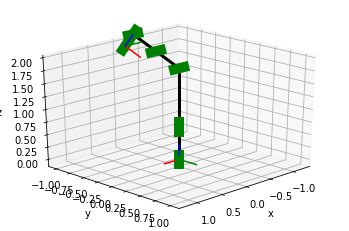

In [72]:
alims = [[-1.3,1.3],[-1.1,1.1],[-0.1, 2]]
Drobot.plot([0, 0.5, -0.5, 0., -0, 0], axlimits=alims, ascale=0.3, ee=False)

In [73]:
# "qt" realiza el gráfico en una ventana nueva
%matplotlib qt

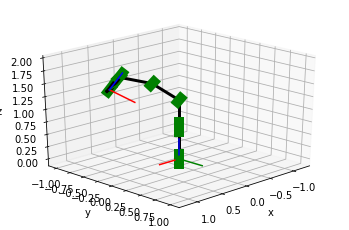

In [80]:
# Se abrirá una nueva ventana donde se visualizará el robot
for i in range(40):
    q = [np.deg2rad(0.72*i), -0.003*i , np.deg2rad(-0.95*i), np.deg2rad(0.75*i), np.deg2rad(-0.5*i), np.deg2rad(-0.15*i) ]  # En grados
    Drobot.plot(q, axlimits=alims)
    plt.pause(0.01)   